# Statistical Analysis (Descriptive Analysis)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Read the dataset
df = pd.read_csv("clean_data.csv")

## General Analysis

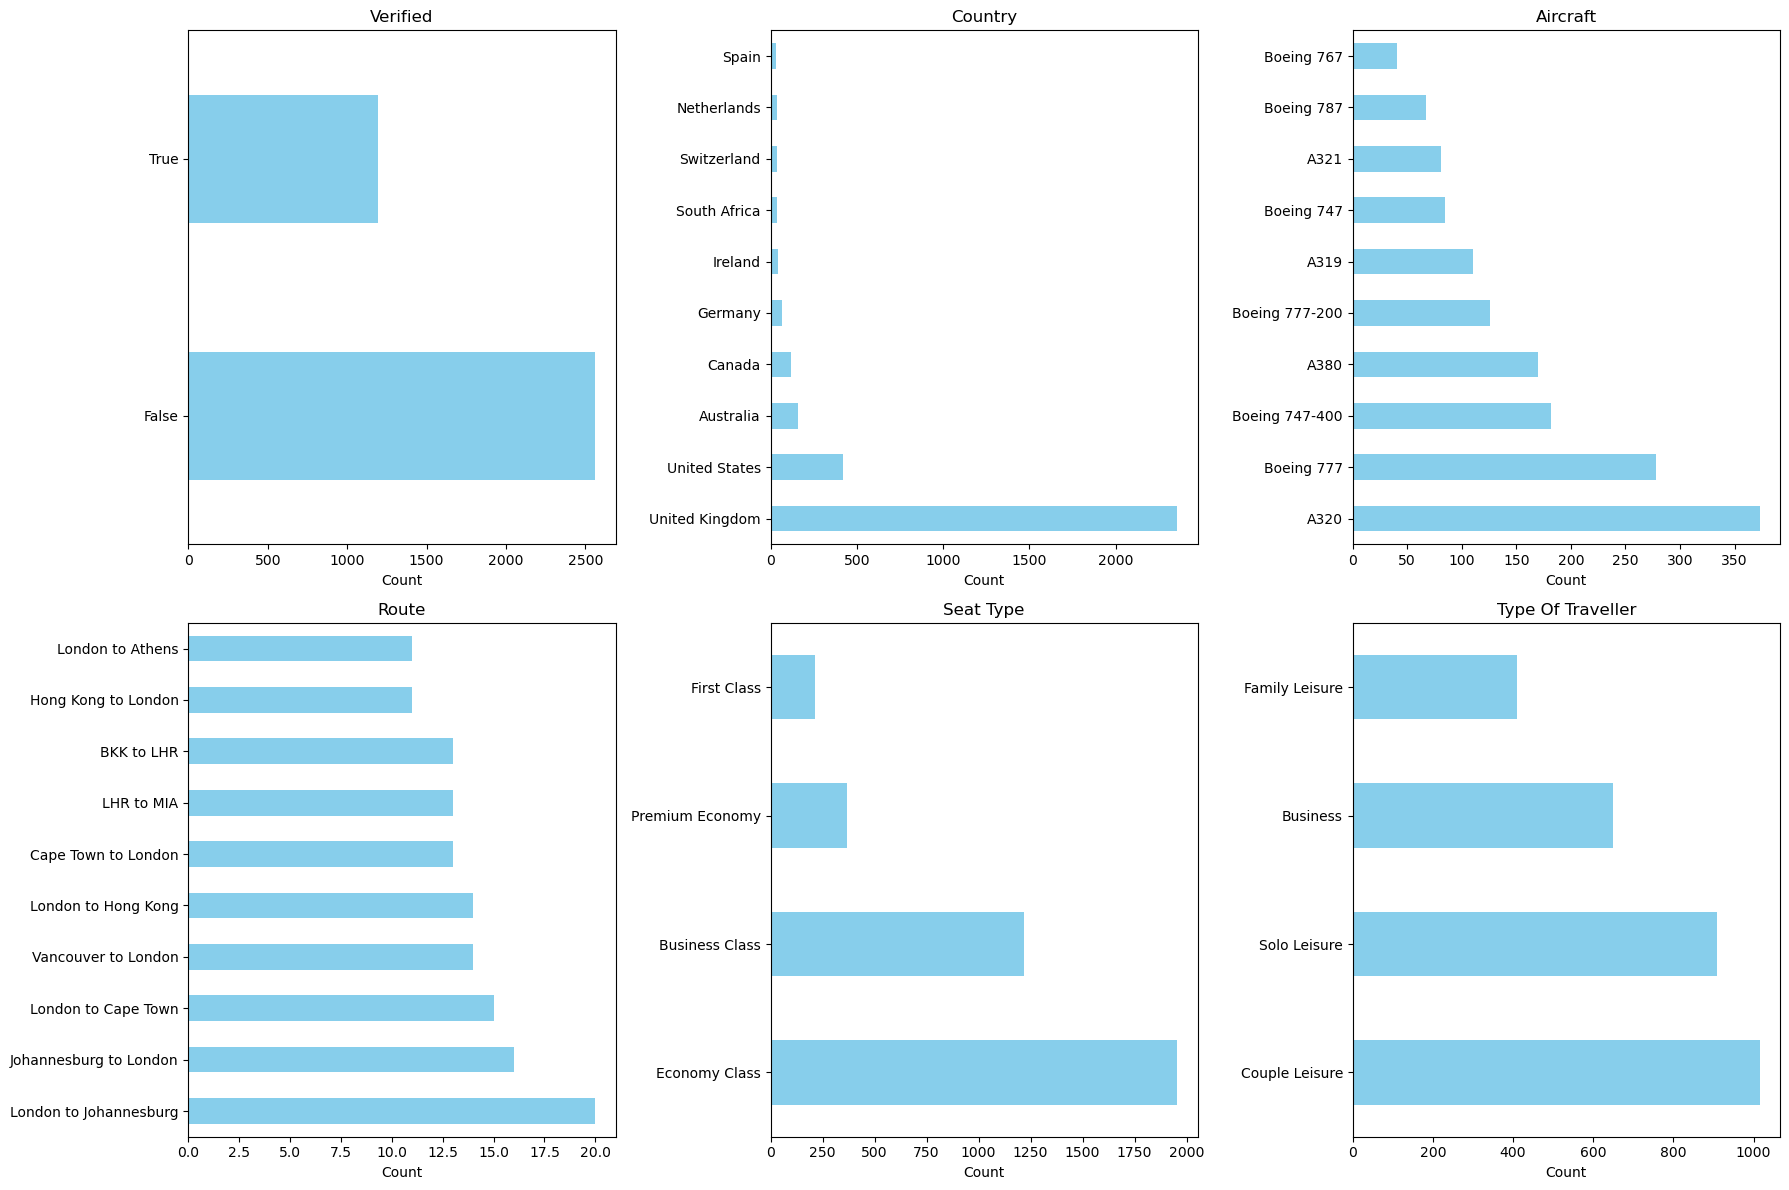

In [3]:
# List of columns to plot
columns_to_plot = ['Verified', 'Country', 'Aircraft', 'Route', 'Seat Type', 'Type Of Traveller']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # Adjusted the subplot grid size

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(columns_to_plot):
    # Exclude NaN values
    filtered_data = df[column].dropna()
    
    # Count occurrences of each value and select top 10
    top_10_counts = filtered_data.value_counts().head(10).sort_values(ascending=True)
    
    # Plot the data
    top_10_counts.plot(kind='barh', ax=axes[i], color='skyblue')
    
    # Add titles and labels
    axes[i].set_title(column)
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('')
    axes[i].invert_yaxis()  # Invert y-axis to display highest count at the top

# Hide the remaining subplots if the number of columns to plot is less than the total number of subplots
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Service Analysis 

In [4]:
df.head()

,ID,Dates Review,Day Review,Month Review,Month Review Number,Year Review,Verified,Customer Name,Month Flown,Month Flown Number,...,Seat Type,Route,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Review
0,0,2024-02-23,23,February,2,2024,True,Peter Hansell,September,9.0,...,Economy Class,Pisa to London Heathrow,NaN,NaN,NaN,NaN,NaN,1,no,That was supposed to be my flight but it was c...
1,1,2024-02-21,21,February,2,2024,True,Caleb Lowe,February,2.0,...,Business Class,Malaga to London Heathrow,5.0,5.0,5.0,4.0,NaN,4,yes,Have no fear when your BA flight is operated b...
2,2,2024-02-17,17,February,2,2024,False,Kevin Statham,February,2.0,...,Economy Class,Phoenix to Lisbon via London,1.0,5.0,3.0,1.0,1.0,1,no,We have flown BA five times from western USA t...
3,3,2024-02-17,17,February,2,2024,True,C Horton,February,2.0,...,Economy Class,London to Istanbul,3.0,1.0,1.0,2.0,NaN,2,no,London Heathrow to Istanbul at the start of th...
4,4,2024-02-16,16,February,2,2024,False,Anthony C Gallagher,January,1.0,...,Premium Economy,"Austin, TX to Shannon, Ireland via Austin",3.0,5.0,3.0,4.0,NaN,2,no,"Jan 30th, I booked a last-minute, transatlanti..."


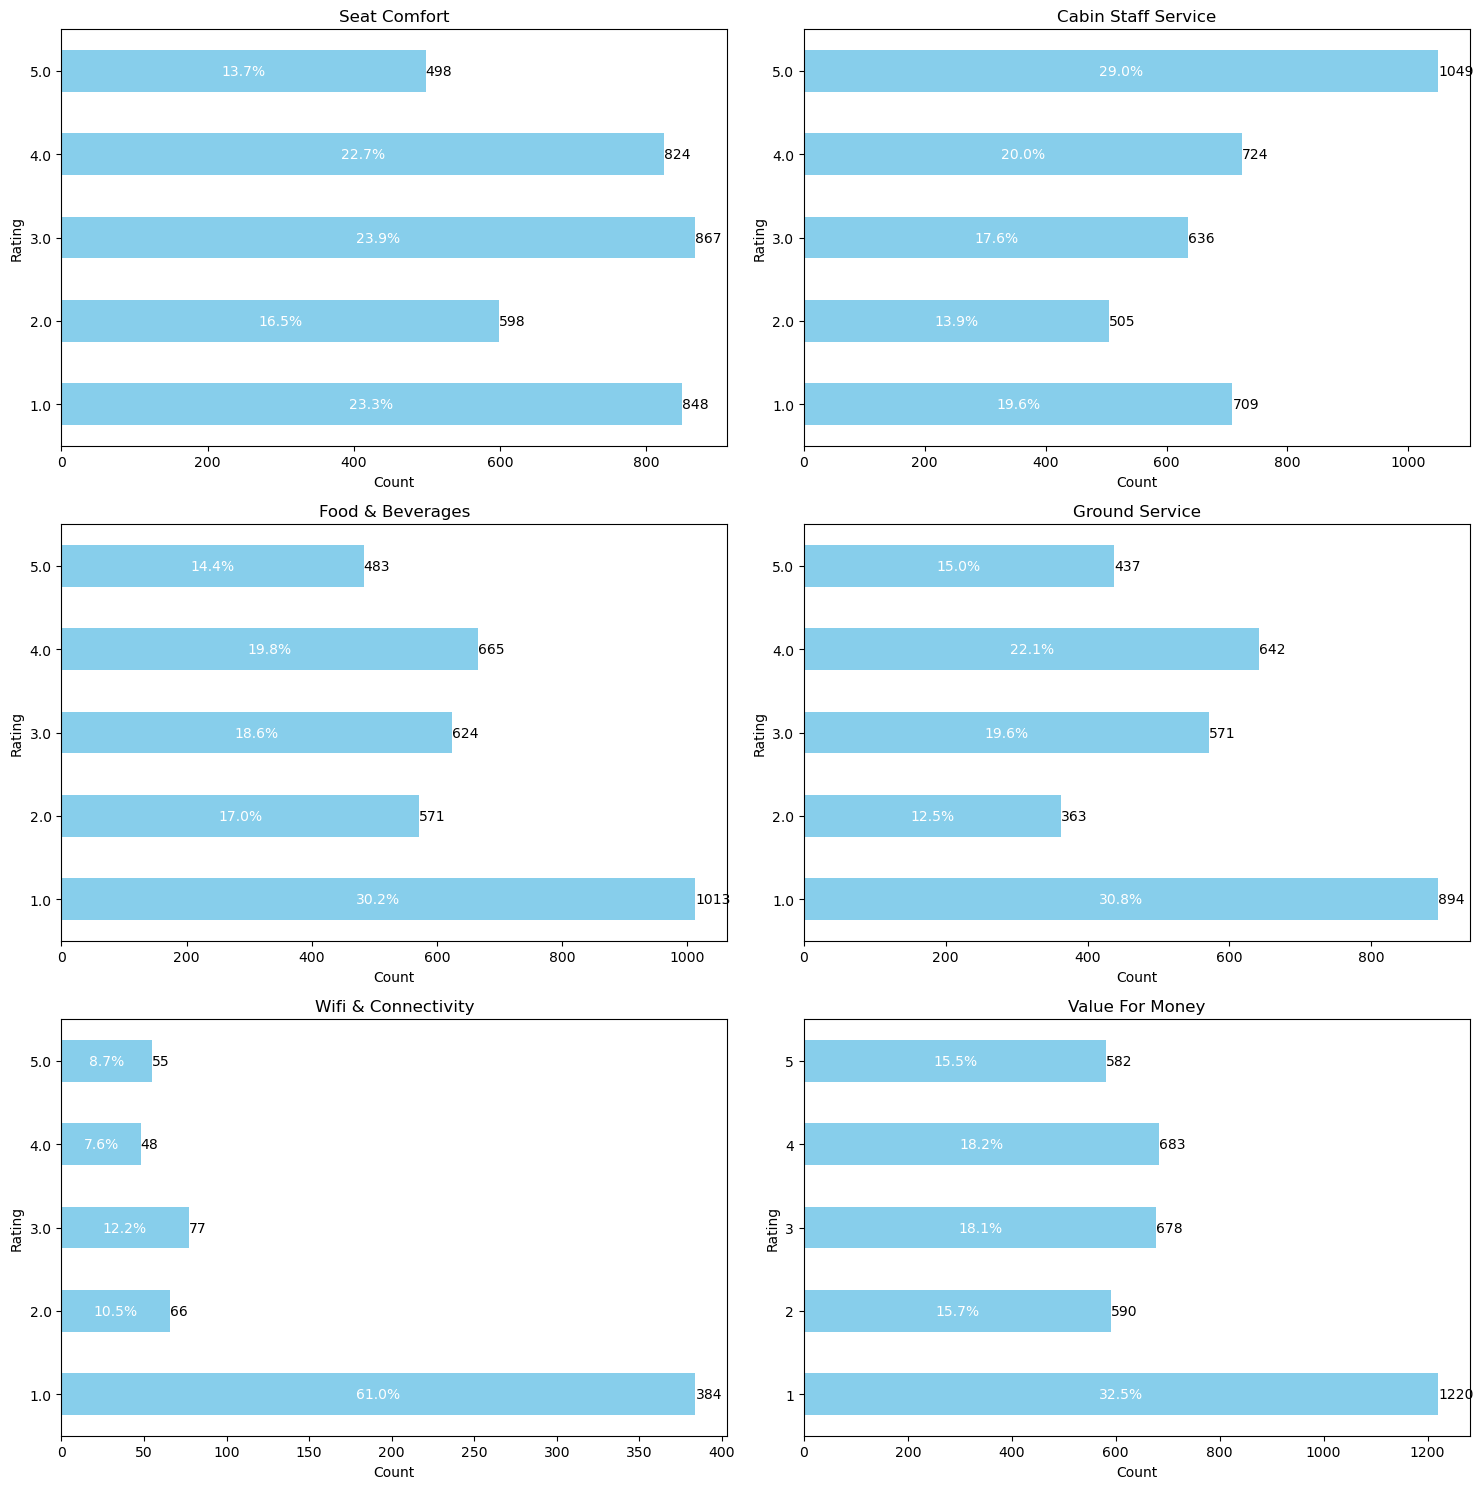

In [5]:
# Define the list of columns
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(columns):
    # Exclude 0 values for 'Food & Beverages' and 'Value For Money' columns
    if column in ['Food & Beverages', 'Value For Money']:
        filtered_data = df[df[column] > 0]
        counts = filtered_data[column].value_counts().sort_index()
    else:
        counts = df[column].value_counts().sort_index()
    
    # Plot the data horizontally
    counts.plot(kind='barh', ax=axes[i], color='skyblue')
    
    # Add titles and labels
    axes[i].set_title(column)
    axes[i].set_ylabel('Rating')
    axes[i].set_xlabel('Count')
    
    # Calculate percentage of total
    total_count = counts.sum()
    for j, (index, value) in enumerate(counts.items()):
        # Add percentage at the middle of the bar
        percentage = '{:.1f}%'.format(100 * value / total_count)
        axes[i].text(value / 2, j, percentage, ha='center', va='center', color='white')
        
        # Add total count at the right of the bar
        axes[i].text(value, j, str(value), ha='left', va='center', color='black')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [6]:
# Define the list of columns
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

# Create a dictionary to store summary statistics for each column
summary_statistics = {}

# Compute summary statistics for each column
for column in columns:
    # Compute summary statistics for the current column
    summary_statistics[column] = df[column].describe()

# Create a DataFrame to store the summary statistics
summary_df = pd.DataFrame(summary_statistics)
summary_df


,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Wifi & Connectivity,Value For Money
count,3635.000000,3623.000000,3357.000000,2907.000000,630.000000,3754.000000
mean,2.869601,3.248137,2.711349,2.781562,1.926984,2.684070
std,1.362299,1.489696,1.438996,1.459512,1.348992,1.470494
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


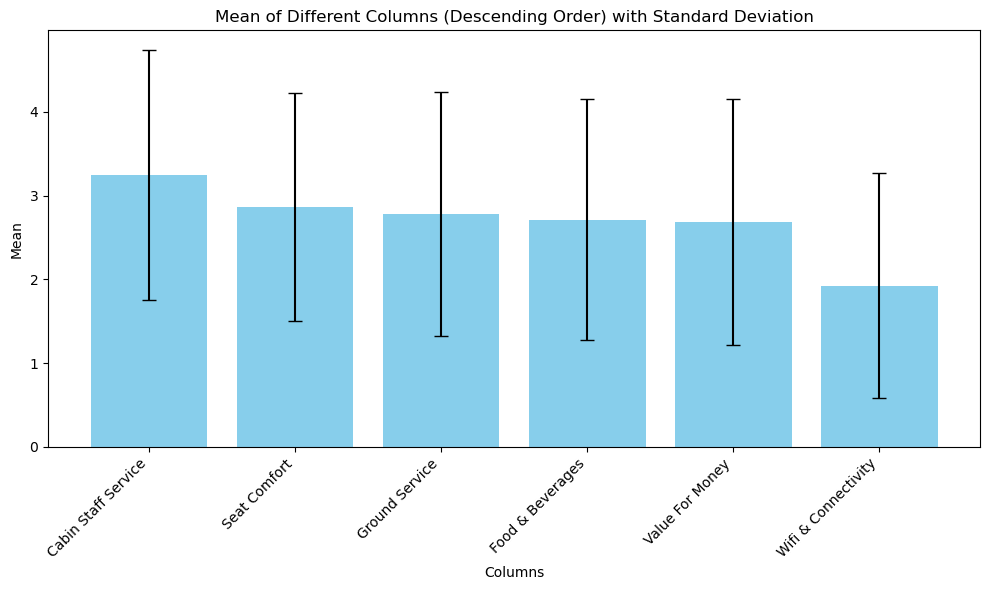

In [7]:
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

# Create a dictionary to store summary statistics for each column
summary_statistics = {}

# Compute summary statistics for each column
for column in columns:
    # Compute summary statistics for the current column
    summary_statistics[column] = df[column].describe()

# Extract the mean values and standard deviations for each column
means = [summary_statistics[column]['mean'] for column in columns]
stds = [summary_statistics[column]['std'] for column in columns]

# Sort the means and columns in descending order
sorted_means, sorted_columns = zip(*sorted(zip(means, columns), reverse=True))
sorted_stds = [summary_statistics[column]['std'] for column in sorted_columns]

# Plot the means of each column in descending order with error bars
plt.figure(figsize=(10, 6))
plt.bar(sorted_columns, sorted_means, color='skyblue', yerr=sorted_stds, capsize=5)  # Add error bars with std
plt.xlabel('Columns')
plt.ylabel('Mean')
plt.title('Mean of Different Columns (Descending Order) with Standard Deviation')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

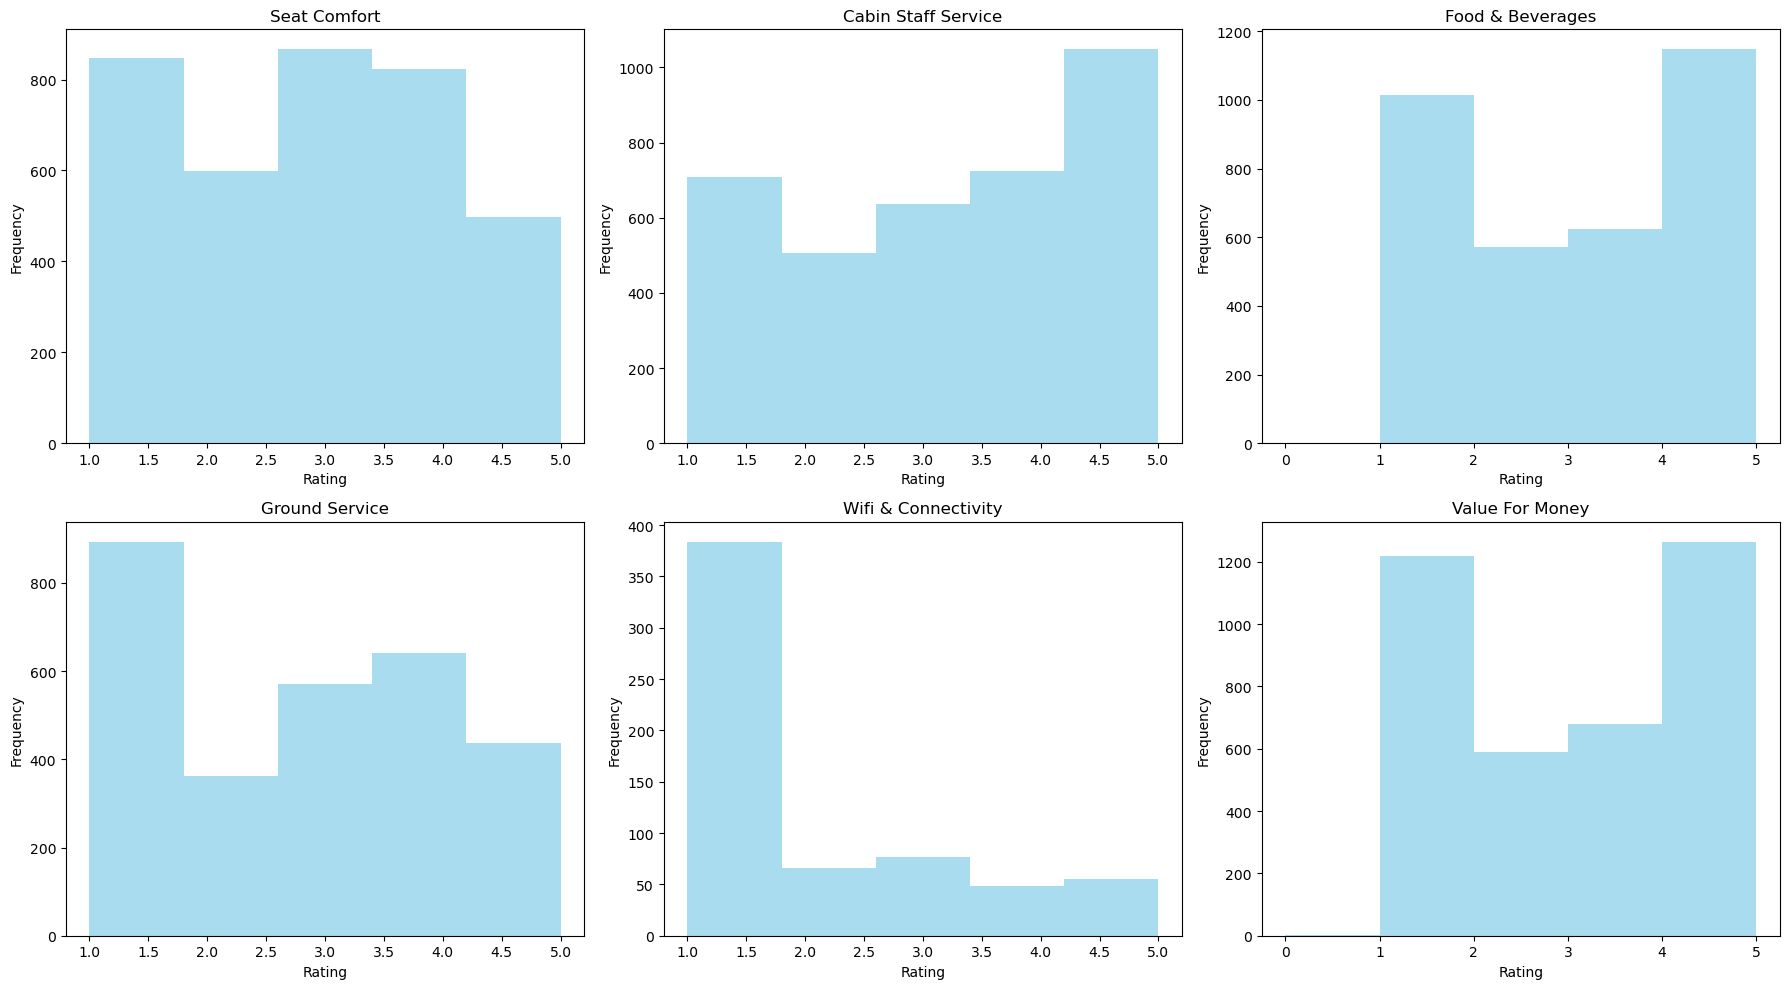

In [8]:
# Define columns of interest
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each column and plot histograms
for i, column in enumerate(columns):
    axes[i].hist(df[column], bins=5, color='skyblue', alpha=0.7)
    axes[i].set_title(column)
    axes[i].set_xlabel('Rating')
    axes[i].set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [9]:
# Check correlation between 'Food & Beverages' and 'Value For Money'
correlation = df['Food & Beverages'].corr(df['Value For Money'])

print("Correlation between Food & Beverages and Value for Money:", correlation)

Correlation between Food & Beverages and Value for Money: 0.7060512612750123


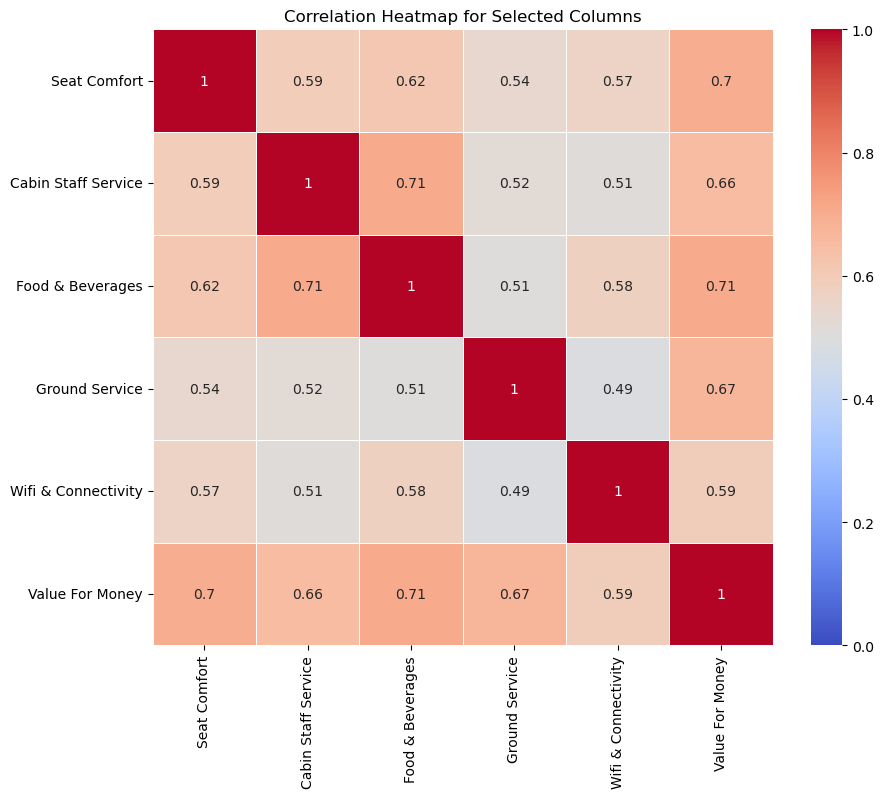

In [10]:
# Define columns of interest
columns = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity', 'Value For Money']

# Select only the columns of interest
df_selected = df[columns]

# Calculate the correlation matrix
corr_matrix = df_selected.corr()

# Create a heatmap with color scale from 0 to 1
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=0, vmax=1)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

## Score Analysis

In [11]:
# Calculate the average score (Assume the weight is equal)
df['Score'] = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Wifi & Connectivity']].mean(axis=1)

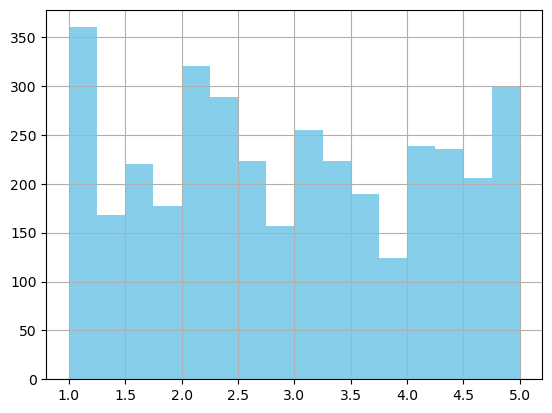

In [12]:
df['Score'].hist(bins = 16, color = 'skyblue')
plt.show()

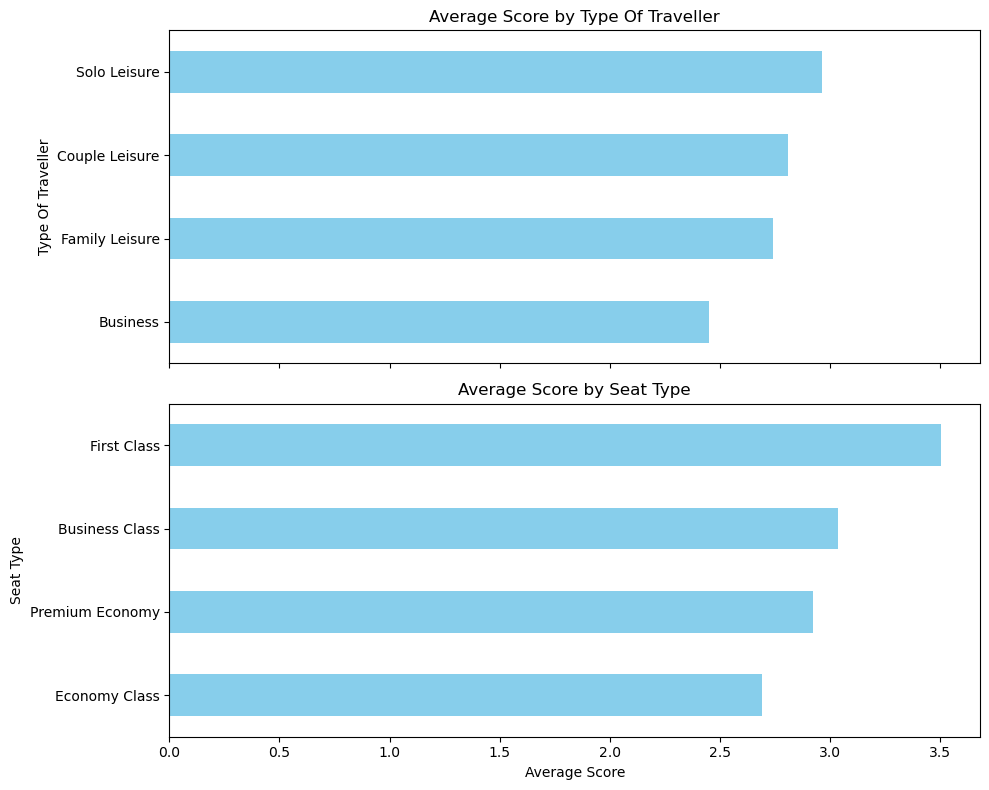

In [13]:
# List of columns to analyze
columns_to_analyze = ['Type Of Traveller', 'Seat Type']

# Create subplots
fig, axes = plt.subplots(nrows=len(columns_to_analyze), figsize=(10, 8), sharex=True)

# Iterate over each column and plot
for i, column in enumerate(columns_to_analyze):
    # Group by the column and calculate the mean score
    average_score_by_category = df.groupby(column)['Score'].mean().sort_values()
    
    # Plot the average score for each category
    average_score_by_category.plot(kind='barh', ax=axes[i], color='skyblue')
    
    # Set title and labels
    axes[i].set_title(f'Average Score by {column}')
    axes[i].set_ylabel(column)
    axes[i].set_xlabel('Average Score')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

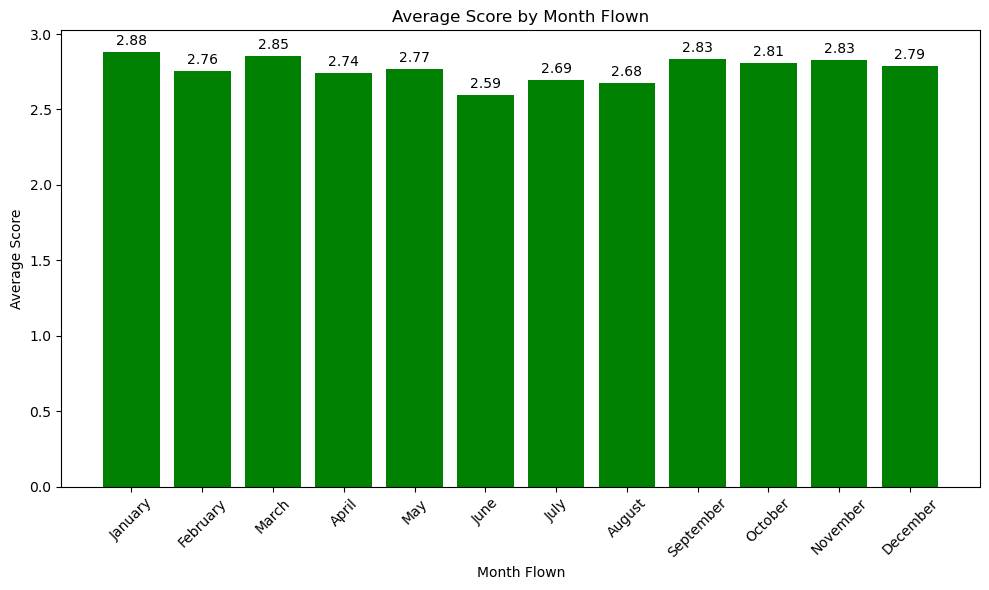

In [14]:
# Calculate the average score for each month
average_score_by_month = df.groupby('Month Flown Number')['Score'].mean()

# Sort the index to ensure the bar chart is ordered by month
average_score_by_month = average_score_by_month.sort_index()

# Get month names to use as labels
month_names = df.groupby('Month Flown Number')['Month Flown'].first()

# Plot the average score for each month using a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(month_names, average_score_by_month, color='green')
plt.xlabel('Month Flown')
plt.ylabel('Average Score')
plt.title('Average Score by Month Flown')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Add labels to the top of the bars
for bar in bars:
    height = bar.get_height()
    plt.annotate('{}'.format(round(height, 2)),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


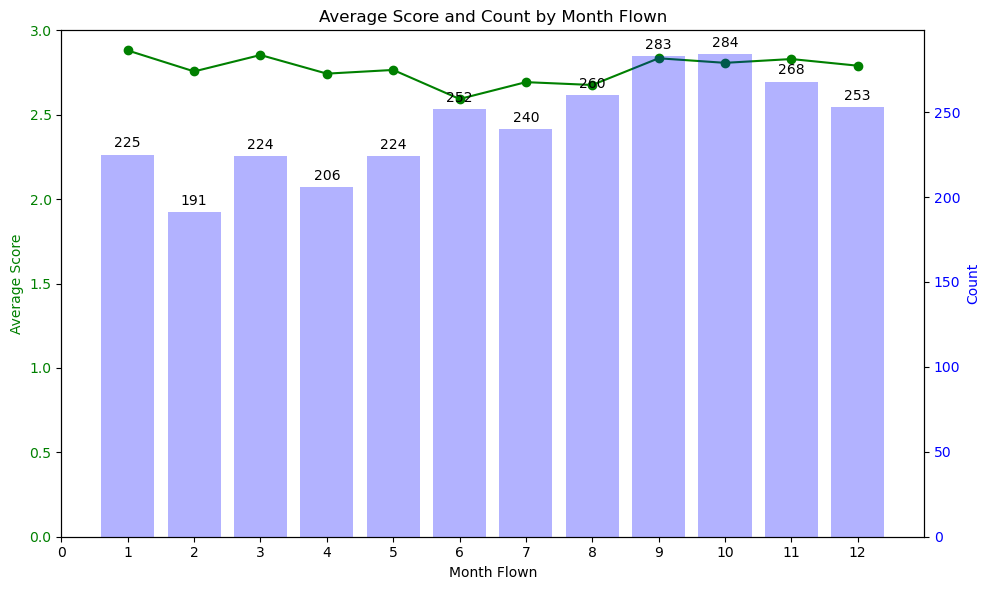

In [15]:
# Filter out NaN values from the 'Month Flown' column and calculate the average score and count for each month
average_score_and_count_by_month = df.dropna(subset=['Month Flown']).groupby('Month Flown Number')['Score'].agg(['mean', 'count'])

# Sort the index to ensure the line plot is ordered by date
average_score_and_count_by_month = average_score_and_count_by_month.sort_index()

# Plot the average score for each date using a line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the average score
color = 'green'
ax1.set_xlabel('Month Flown')
ax1.set_ylabel('Average Score', color=color)
ax1.plot(average_score_and_count_by_month.index, average_score_and_count_by_month['mean'], color=color, marker='o', linestyle='-')
ax1.tick_params(axis='y', labelcolor=color)

# Set y-axis limit from 0 to 3
ax1.set_ylim(0, 3)

# Create a second y-axis for the count
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Count', color=color)
bars = ax2.bar(average_score_and_count_by_month.index, average_score_and_count_by_month['count'], color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# Add labels to the top of the bars
for bar in bars:
    height = bar.get_height()
    ax2.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Add title and rotate x-axis labels
plt.title('Average Score and Count by Month Flown')
plt.xticks(range(13))  # Set x-axis ticks from 0 to 12
plt.xlim(0, 13)  # Set x-axis limit to start from 0 and end at 12

# Adjust layout to prevent clipping of labels
plt.tight_layout()
plt.show()


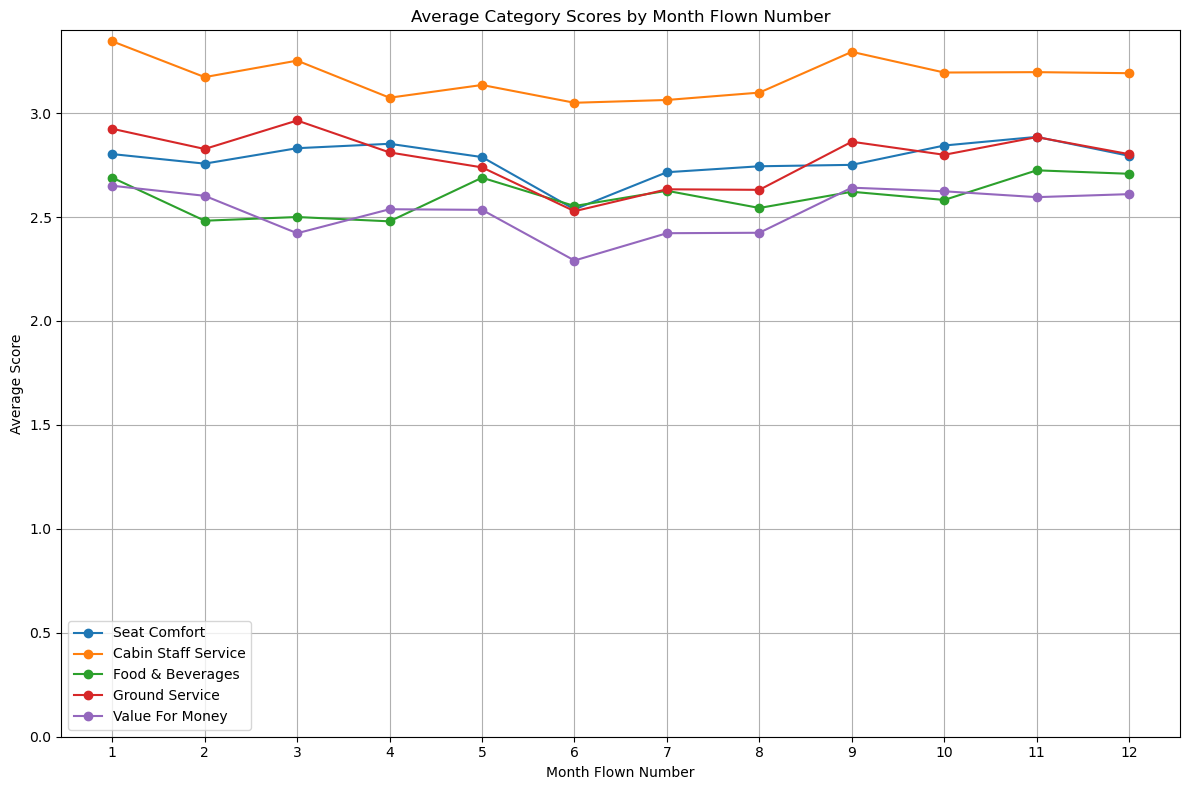

In [16]:
# Calculate the average score for each aspect by month flown
average_scores_by_month_number = df.groupby('Month Flown Number')[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Value For Money']].mean()

# Plot the average scores for each aspect by month flown using a line plot
fig, ax = plt.subplots(figsize=(12, 8))

for column in average_scores_by_month_number.columns:
    average_scores_by_month_number[column].plot(kind='line', marker='o', label=column)

ax.set_xlabel('Month Flown Number')
ax.set_ylabel('Average Score')
ax.set_title('Average Category Scores by Month Flown Number')
ax.grid(True)  # Add gridlines to the plot

# Set x-axis ticks to range from 1 to 12
plt.xticks(range(1, 13))

plt.legend()  # Add legend to the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
ax.set_ylim(0)  # Set y-axis limit to start from 0
plt.show()

In [17]:
def plot_top_bottom_bar(df, column_name, title):
    # Calculate the average score and count for each category in the specified column
    group_data = df.groupby(column_name)['Score'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
    top_bottom_data = pd.concat([group_data.head(5), group_data.tail(5)])

    # Get the number of categories
    num_categories = len(top_bottom_data)

    # Set the width of the bars
    bar_width = 0.35

    # Set the positions of the bars on the x-axis
    index = np.arange(num_categories)

    # Plot the average score and count for selected categories using a clustered bar chart
    plt.figure(figsize=(20, 10))

    # Plot bars for average score
    plt.bar(index, top_bottom_data['mean'], bar_width, color='gray', label='Average Score')

    # Plot bars for count
    plt.bar(index + bar_width, top_bottom_data['count'], bar_width, color='lightblue', alpha=0.5, label='Count')

    # Color the bars for top and bottom categories
    for i in range(num_categories):
        if top_bottom_data.index[i] in group_data.head(5).index:
            plt.gca().get_children()[i].set_color('green')  # Color top categories green
            plt.gca().get_children()[i + num_categories].set_color('green')
        else:
            plt.gca().get_children()[i].set_color('red')  # Color bottom categories red
            plt.gca().get_children()[i + num_categories].set_color('red')

    plt.xlabel(column_name)
    plt.ylabel('Average Score / Count')
    plt.title(f'Average Score and Count by {title}')
    plt.xticks(index + bar_width / 2, top_bottom_data.index, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()

    plt.show()

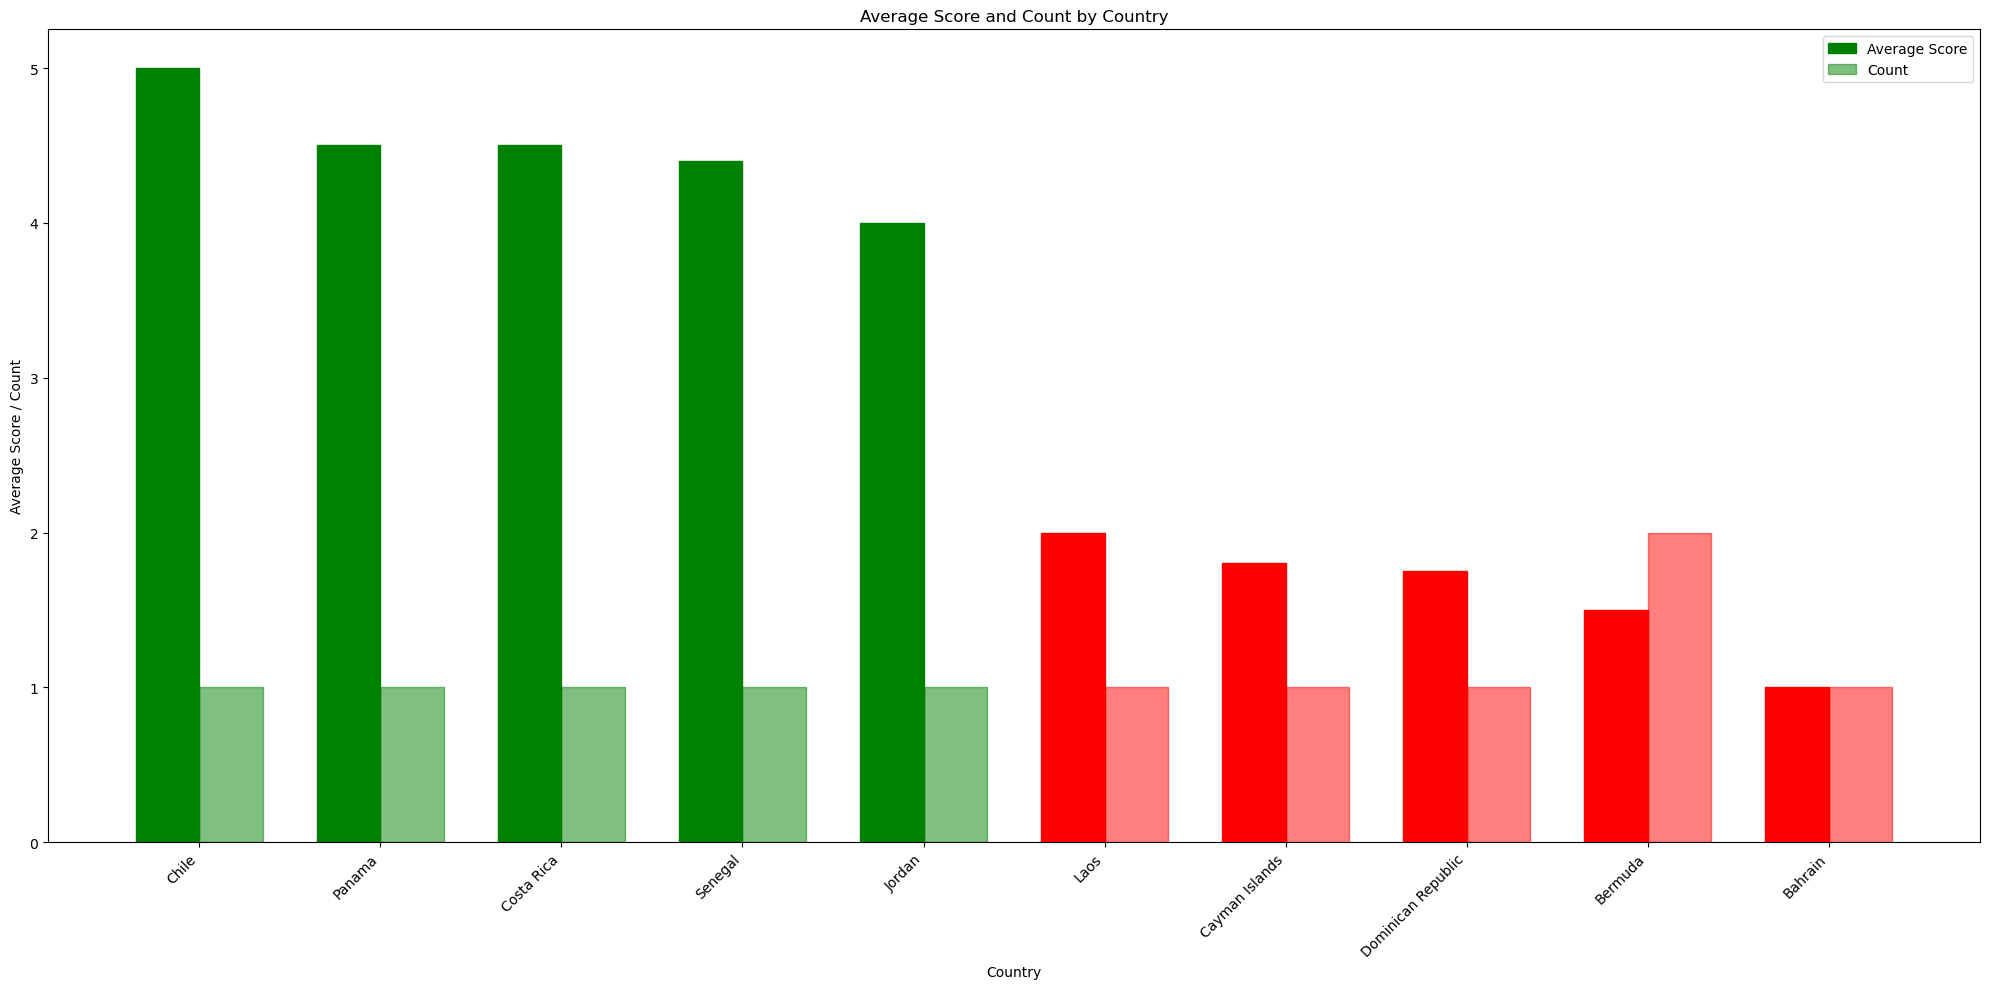

In [18]:
# Plot for 'Country'
plot_top_bottom_bar(df, 'Country', 'Country')

In [19]:
# high review are low in count, so it's not statsitically significant

In [20]:
def plot_scrollable_bar(df, column_name, title):
    # Filter the DataFrame to include only countries with count > 10
    filtered_df = df.groupby(column_name).filter(lambda x: len(x) > 30)

    # Calculate the average score for each category in the specified column
    average_score_by_category = filtered_df.groupby(column_name)['Score'].mean().sort_values()

    # Plot the average score for each category using a bar chart
    plt.figure(figsize=(20, 10))

    # Use subplot with adjustable box to enable scrolling
    plt.subplot(111, aspect='auto')
    plt.barh(average_score_by_category.index, average_score_by_category, color='skyblue')
    plt.xlabel('Average Score')
    plt.ylabel(column_name)
    plt.title(f'Average Score by {title}')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest average score at the top
    plt.tight_layout()

    # Enable interactive scrolling
    plt.subplots_adjust(left=0.25, right=0.9, top=0.9, bottom=0.1)
    plt.show()

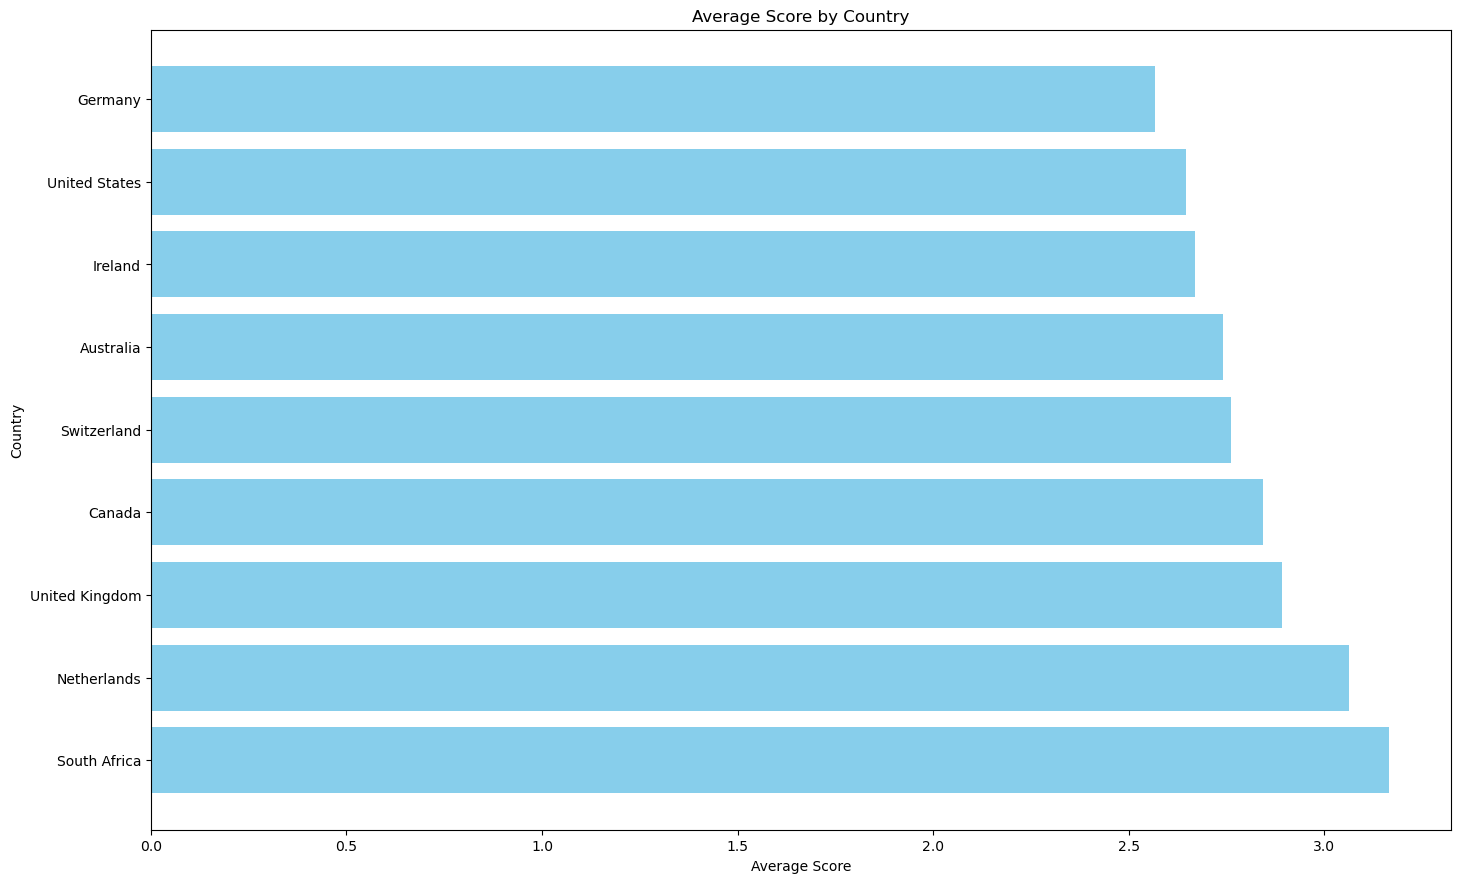

In [21]:
# Plot for 'Country' Avg Score but only include country that have more than 30 reviews
plot_scrollable_bar(df, 'Country', 'Country')

## TIme Series Analysis

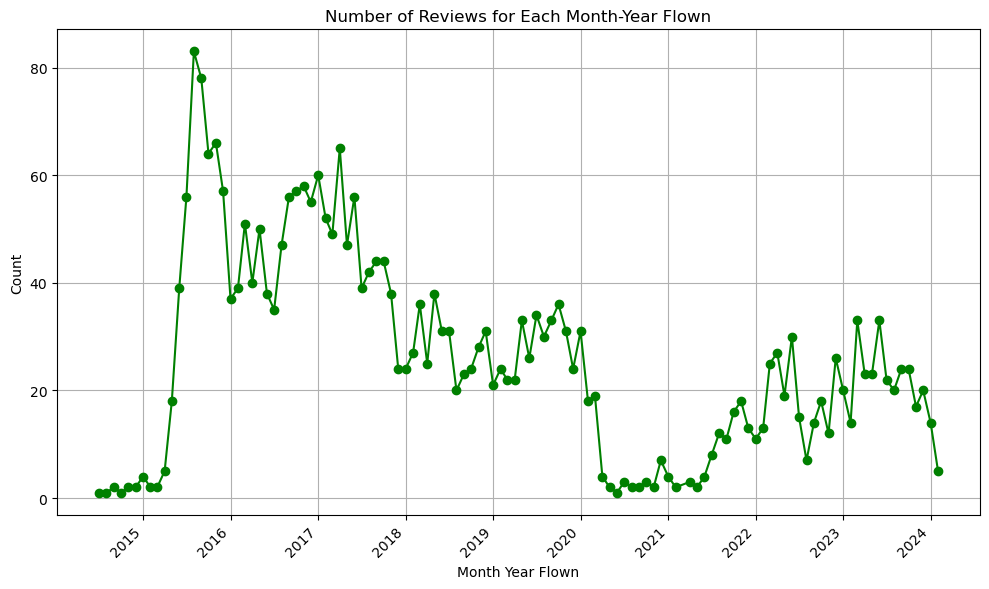

In [22]:
# Convert 'Month Year Flown' to datetime
df['Month Year Flown'] = pd.to_datetime(df['Month Year Flown'], format='%m/%Y')

# Count the occurrences of each month-year combination
month_year_flown_counts = df['Month Year Flown'].value_counts()

# Sort the index to ensure the line plot is ordered by month-year
month_year_flown_counts = month_year_flown_counts.sort_index()

# Plot the count of occurrences for each month-year combination using a line plot
month_year_flown_counts.plot(kind='line', figsize=(10, 6), marker='o', color='green', linestyle='-')
plt.xlabel('Month Year Flown')
plt.ylabel('Count')
plt.title('Number of Reviews for Each Month-Year Flown')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)  # Add gridlines to the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

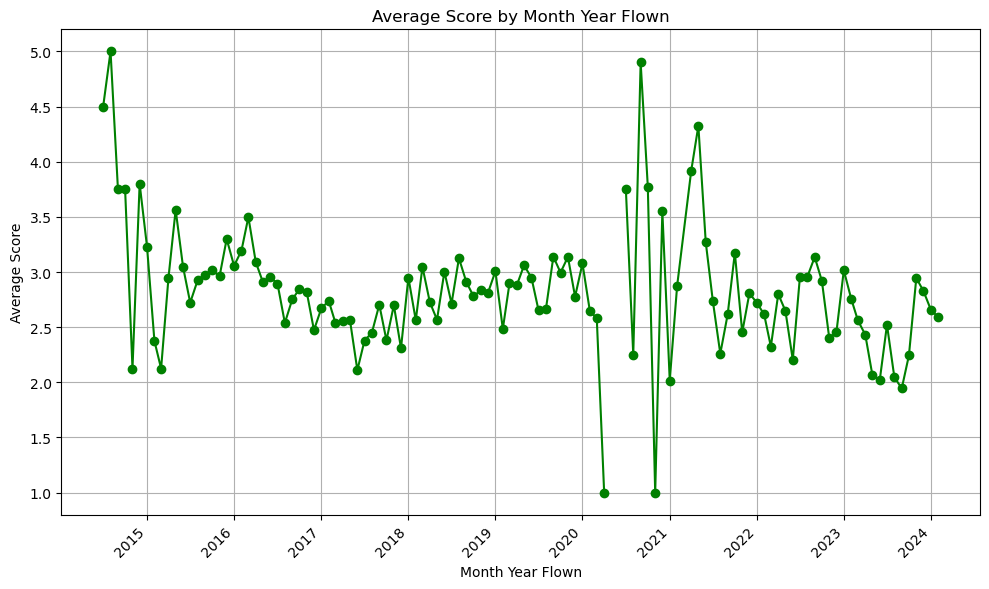

In [23]:
# Calculate the average score for each 'Month Year Flown'
average_score_by_month_year = df.groupby('Month Year Flown')['Score'].mean()

# Sort the index to ensure the line plot is ordered by 'Month Year Flown'
average_score_by_month_year = average_score_by_month_year.sort_index()

# Plot the average score for each 'Month Year Flown' using a line plot
average_score_by_month_year.plot(kind='line', figsize=(10, 6), marker='o', color='green', linestyle='-')
plt.xlabel('Month Year Flown')
plt.ylabel('Average Score')
plt.title('Average Score by Month Year Flown')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.grid(True)  # Add gridlines to the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
